In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from tensorflow.python.lib.io import file_io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping, Callback
import h5py
import cv2
import os
from tqdm import tqdm
from random import shuffle

Using TensorFlow backend.


In [0]:
NUM_OF_CLASSES = 4
img_height = 150
img_width = 150
epochs_all_layers   = 100
batch_size          = 32

In [4]:
file_paths = ["drive/My Drive/vision_dataset/image/metal/","drive/My Drive/vision_dataset/image/leather/","drive/My Drive/vision_dataset/image/wood/","drive/My Drive/vision_dataset/image/glass/"]
training_data = []
label = -1
for file_path in file_paths:
  label = label + 1
  for img in tqdm(os.listdir(file_path)):
    print(img) 
    path = os.path.join(file_path,img)
    image = cv2.imread(path)
    image = cv2.resize(image, (img_height, img_width))
    print(image.shape)
    training_data.append([np.array(image),np.array(label)])

  0%|          | 0/100 [00:00<?, ?it/s]

metal_moderate_006_new.jpg


  1%|          | 1/100 [00:00<00:45,  2.18it/s]

(150, 150, 3)
metal_object_019_new.jpg


  2%|▏         | 2/100 [00:00<00:42,  2.29it/s]

(150, 150, 3)
metal_object_018_new.jpg


  3%|▎         | 3/100 [00:01<00:41,  2.33it/s]

(150, 150, 3)
metal_moderate_024_new.jpg


  4%|▍         | 4/100 [00:01<00:40,  2.39it/s]

(150, 150, 3)
metal_moderate_023_new.jpg


  5%|▌         | 5/100 [00:02<00:38,  2.45it/s]

(150, 150, 3)
metal_moderate_032_new.jpg


  6%|▌         | 6/100 [00:02<00:37,  2.54it/s]

(150, 150, 3)
metal_object_038_new.jpg


  7%|▋         | 7/100 [00:02<00:35,  2.61it/s]

(150, 150, 3)
metal_object_029_new.jpg


  8%|▊         | 8/100 [00:03<00:34,  2.64it/s]

(150, 150, 3)
metal_object_028_new.jpg


  9%|▉         | 9/100 [00:03<00:33,  2.76it/s]

(150, 150, 3)
metal_object_039_new.jpg


 10%|█         | 10/100 [00:03<00:31,  2.83it/s]

(150, 150, 3)
metal_object_044_new.jpg


 11%|█         | 11/100 [00:04<00:34,  2.56it/s]

(150, 150, 3)
metal_object_034_new.jpg


 12%|█▏        | 12/100 [00:04<00:33,  2.61it/s]

(150, 150, 3)
metal_moderate_001_new.jpg


 13%|█▎        | 13/100 [00:04<00:32,  2.64it/s]

(150, 150, 3)
metal_moderate_004_new.jpg


 14%|█▍        | 14/100 [00:05<00:31,  2.71it/s]

(150, 150, 3)
metal_object_036_new.jpg


 15%|█▌        | 15/100 [00:05<00:30,  2.76it/s]

(150, 150, 3)
metal_moderate_018_new.jpg


 16%|█▌        | 16/100 [00:05<00:28,  2.90it/s]

(150, 150, 3)
metal_moderate_047_new.jpg


 17%|█▋        | 17/100 [00:06<00:28,  2.88it/s]

(150, 150, 3)
metal_object_006_new.jpg


 18%|█▊        | 18/100 [00:06<00:29,  2.76it/s]

(150, 150, 3)
metal_moderate_049_new.jpg


 19%|█▉        | 19/100 [00:07<00:30,  2.66it/s]

(150, 150, 3)
metal_object_014_new.jpg


 20%|██        | 20/100 [00:07<00:28,  2.82it/s]

(150, 150, 3)
metal_object_008_new.jpg


 21%|██        | 21/100 [00:07<00:27,  2.84it/s]

(150, 150, 3)
metal_object_015_new.jpg


 22%|██▏       | 22/100 [00:08<00:26,  2.96it/s]

(150, 150, 3)
metal_object_033_new.jpg


 23%|██▎       | 23/100 [00:08<00:26,  2.96it/s]

(150, 150, 3)
metal_moderate_038_new.jpg


 24%|██▍       | 24/100 [00:08<00:26,  2.91it/s]

(150, 150, 3)
metal_object_004_new.jpg


 25%|██▌       | 25/100 [00:09<00:26,  2.84it/s]

(150, 150, 3)
metal_object_049_new.jpg


 26%|██▌       | 26/100 [00:09<00:25,  2.91it/s]

(150, 150, 3)
metal_moderate_012_new.jpg


 27%|██▋       | 27/100 [00:09<00:25,  2.83it/s]

(150, 150, 3)
metal_object_024_new.jpg


 28%|██▊       | 28/100 [00:10<00:24,  2.92it/s]

(150, 150, 3)
metal_moderate_044_new.jpg


 29%|██▉       | 29/100 [00:10<00:24,  2.94it/s]

(150, 150, 3)
metal_moderate_022_new.jpg


 30%|███       | 30/100 [00:10<00:23,  2.96it/s]

(150, 150, 3)
metal_moderate_045_new.jpg


 31%|███       | 31/100 [00:11<00:23,  2.95it/s]

(150, 150, 3)
metal_moderate_016_new.jpg


 32%|███▏      | 32/100 [00:11<00:22,  3.04it/s]

(150, 150, 3)
metal_object_011_new.jpg


 33%|███▎      | 33/100 [00:11<00:21,  3.06it/s]

(150, 150, 3)
metal_moderate_003_new.jpg


 34%|███▍      | 34/100 [00:12<00:21,  3.00it/s]

(150, 150, 3)
metal_moderate_048_new.jpg


 35%|███▌      | 35/100 [00:12<00:21,  3.09it/s]

(150, 150, 3)
metal_object_010_new.jpg


 36%|███▌      | 36/100 [00:13<00:25,  2.55it/s]

(150, 150, 3)
metal_object_022_new.jpg


 37%|███▋      | 37/100 [00:13<00:23,  2.68it/s]

(150, 150, 3)
metal_object_026_new.jpg


 38%|███▊      | 38/100 [00:13<00:22,  2.75it/s]

(150, 150, 3)
metal_object_007_new.jpg


 39%|███▉      | 39/100 [00:13<00:21,  2.89it/s]

(150, 150, 3)
metal_object_045_new.jpg


 40%|████      | 40/100 [00:14<00:20,  2.97it/s]

(150, 150, 3)
metal_moderate_019_new.jpg


 41%|████      | 41/100 [00:14<00:19,  2.97it/s]

(150, 150, 3)
metal_object_001_new.jpg


 42%|████▏     | 42/100 [00:14<00:18,  3.07it/s]

(150, 150, 3)
metal_moderate_039_new.jpg


 43%|████▎     | 43/100 [00:15<00:18,  3.09it/s]

(150, 150, 3)
metal_moderate_033_new.jpg


 44%|████▍     | 44/100 [00:15<00:18,  2.99it/s]

(150, 150, 3)
metal_moderate_013_new.jpg


 45%|████▌     | 45/100 [00:15<00:18,  3.01it/s]

(150, 150, 3)
metal_object_025_new.jpg


 46%|████▌     | 46/100 [00:16<00:17,  3.08it/s]

(150, 150, 3)
metal_object_003_new.jpg


 47%|████▋     | 47/100 [00:16<00:17,  3.01it/s]

(150, 150, 3)
metal_moderate_031_new.jpg


 48%|████▊     | 48/100 [00:16<00:16,  3.11it/s]

(150, 150, 3)
metal_moderate_043_new.jpg


 49%|████▉     | 49/100 [00:17<00:16,  3.16it/s]

(150, 150, 3)
metal_object_031_new.jpg


 50%|█████     | 50/100 [00:17<00:16,  3.12it/s]

(150, 150, 3)
metal_object_035_new.jpg


 51%|█████     | 51/100 [00:17<00:15,  3.19it/s]

(150, 150, 3)
metal_moderate_017_new.jpg


 52%|█████▏    | 52/100 [00:18<00:15,  3.07it/s]

(150, 150, 3)
metal_object_041_new.jpg


 53%|█████▎    | 53/100 [00:18<00:15,  3.10it/s]

(150, 150, 3)
metal_moderate_011_new.jpg


 54%|█████▍    | 54/100 [00:18<00:15,  2.97it/s]

(150, 150, 3)
metal_moderate_009_new.jpg


 55%|█████▌    | 55/100 [00:19<00:15,  2.93it/s]

(150, 150, 3)
metal_moderate_002_new.jpg


 56%|█████▌    | 56/100 [00:19<00:14,  2.98it/s]

(150, 150, 3)
metal_moderate_035_new.jpg


 57%|█████▋    | 57/100 [00:19<00:13,  3.10it/s]

(150, 150, 3)
metal_object_032_new.jpg


 58%|█████▊    | 58/100 [00:20<00:13,  3.07it/s]

(150, 150, 3)
metal_object_050_new.jpg


 59%|█████▉    | 59/100 [00:20<00:13,  3.12it/s]

(150, 150, 3)
metal_moderate_042_new.jpg


 60%|██████    | 60/100 [00:20<00:12,  3.09it/s]

(150, 150, 3)
metal_moderate_026_new.jpg


 61%|██████    | 61/100 [00:21<00:12,  3.06it/s]

(150, 150, 3)
metal_moderate_010_new.jpg


 62%|██████▏   | 62/100 [00:21<00:12,  3.02it/s]

(150, 150, 3)
metal_moderate_041_new.jpg


 63%|██████▎   | 63/100 [00:21<00:12,  3.03it/s]

(150, 150, 3)
metal_object_040_new.jpg


 64%|██████▍   | 64/100 [00:22<00:12,  2.98it/s]

(150, 150, 3)
metal_object_017_new.jpg


 65%|██████▌   | 65/100 [00:22<00:11,  2.93it/s]

(150, 150, 3)
metal_object_043_new.jpg


 66%|██████▌   | 66/100 [00:22<00:11,  2.95it/s]

(150, 150, 3)
metal_moderate_005_new.jpg


 67%|██████▋   | 67/100 [00:23<00:11,  2.93it/s]

(150, 150, 3)
metal_moderate_007_new.jpg


 68%|██████▊   | 68/100 [00:23<00:10,  2.99it/s]

(150, 150, 3)
metal_object_047_new.jpg


 69%|██████▉   | 69/100 [00:23<00:10,  3.08it/s]

(150, 150, 3)
metal_moderate_020_new.jpg


 70%|███████   | 70/100 [00:24<00:11,  2.58it/s]

(150, 150, 3)
metal_moderate_008_new.jpg


 71%|███████   | 71/100 [00:24<00:10,  2.69it/s]

(150, 150, 3)
metal_object_020_new.jpg


 72%|███████▏  | 72/100 [00:25<00:09,  2.82it/s]

(150, 150, 3)
metal_moderate_029_new.jpg


 73%|███████▎  | 73/100 [00:25<00:09,  2.87it/s]

(150, 150, 3)
metal_moderate_037_new.jpg


 74%|███████▍  | 74/100 [00:25<00:09,  2.85it/s]

(150, 150, 3)
metal_object_002_new.jpg


 75%|███████▌  | 75/100 [00:25<00:08,  2.99it/s]

(150, 150, 3)
metal_moderate_036_new.jpg


 76%|███████▌  | 76/100 [00:26<00:07,  3.07it/s]

(150, 150, 3)
metal_object_030_new.jpg


 77%|███████▋  | 77/100 [00:26<00:07,  2.98it/s]

(150, 150, 3)
metal_object_037_new.jpg


 78%|███████▊  | 78/100 [00:26<00:07,  3.01it/s]

(150, 150, 3)
metal_moderate_028_new.jpg


 79%|███████▉  | 79/100 [00:27<00:06,  3.06it/s]

(150, 150, 3)
metal_moderate_021_new.jpg


 80%|████████  | 80/100 [00:27<00:07,  2.80it/s]

(150, 150, 3)
metal_object_023_new.jpg


 81%|████████  | 81/100 [00:28<00:06,  2.87it/s]

(150, 150, 3)
metal_object_027_new.jpg


 82%|████████▏ | 82/100 [00:28<00:06,  2.73it/s]

(150, 150, 3)
metal_object_005_new.jpg


 83%|████████▎ | 83/100 [00:28<00:06,  2.81it/s]

(150, 150, 3)
metal_moderate_040_new.jpg


 84%|████████▍ | 84/100 [00:29<00:05,  2.90it/s]

(150, 150, 3)
metal_object_021_new.jpg


 85%|████████▌ | 85/100 [00:29<00:05,  2.99it/s]

(150, 150, 3)
metal_moderate_014_new.jpg


 86%|████████▌ | 86/100 [00:29<00:04,  2.99it/s]

(150, 150, 3)
metal_object_012_new.jpg


 87%|████████▋ | 87/100 [00:30<00:04,  3.00it/s]

(150, 150, 3)
metal_object_046_new.jpg


 88%|████████▊ | 88/100 [00:30<00:04,  2.95it/s]

(150, 150, 3)
metal_moderate_027_new.jpg


 89%|████████▉ | 89/100 [00:30<00:03,  2.97it/s]

(150, 150, 3)
metal_object_016_new.jpg


 90%|█████████ | 90/100 [00:31<00:03,  2.90it/s]

(150, 150, 3)
metal_object_042_new.jpg


 91%|█████████ | 91/100 [00:31<00:03,  2.95it/s]

(150, 150, 3)
metal_moderate_050_new.jpg


 92%|█████████▏| 92/100 [00:31<00:02,  2.88it/s]

(150, 150, 3)
metal_moderate_046_new.jpg


 93%|█████████▎| 93/100 [00:32<00:02,  2.85it/s]

(150, 150, 3)
metal_object_013_new.jpg


 94%|█████████▍| 94/100 [00:32<00:02,  2.94it/s]

(150, 150, 3)
metal_moderate_025_new.jpg


 95%|█████████▌| 95/100 [00:32<00:01,  2.95it/s]

(150, 150, 3)
metal_moderate_034_new.jpg


 96%|█████████▌| 96/100 [00:33<00:01,  2.86it/s]

(150, 150, 3)
metal_moderate_015_new.jpg


 97%|█████████▋| 97/100 [00:33<00:01,  2.89it/s]

(150, 150, 3)
metal_object_048_new.jpg


 98%|█████████▊| 98/100 [00:33<00:00,  2.99it/s]

(150, 150, 3)
metal_moderate_030_new.jpg


 99%|█████████▉| 99/100 [00:34<00:00,  3.06it/s]

(150, 150, 3)
metal_object_009_new.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

(150, 150, 3)
leather_moderate_027_new.jpg


  1%|          | 1/100 [00:00<00:35,  2.76it/s]

(150, 150, 3)
leather_object_040_new.jpg


  2%|▏         | 2/100 [00:00<00:35,  2.79it/s]

(150, 150, 3)
leather_moderate_009_new.jpg


  3%|▎         | 3/100 [00:01<00:34,  2.84it/s]

(150, 150, 3)
leather_object_021_new.jpg


  4%|▍         | 4/100 [00:01<00:33,  2.88it/s]

(150, 150, 3)
leather_object_002_new.jpg


  5%|▌         | 5/100 [00:01<00:33,  2.87it/s]

(150, 150, 3)
leather_object_031_new.jpg


  6%|▌         | 6/100 [00:02<00:32,  2.90it/s]

(150, 150, 3)
leather_moderate_001_new.jpg


  7%|▋         | 7/100 [00:02<00:30,  3.00it/s]

(150, 150, 3)
leather_object_009_new.jpg


  8%|▊         | 8/100 [00:02<00:31,  2.93it/s]

(150, 150, 3)
leather_object_046_new.jpg


  9%|▉         | 9/100 [00:03<00:32,  2.83it/s]

(150, 150, 3)
leather_object_042_new.jpg


 10%|█         | 10/100 [00:03<00:31,  2.89it/s]

(150, 150, 3)
leather_object_036_new.jpg


 11%|█         | 11/100 [00:03<00:29,  2.99it/s]

(150, 150, 3)
leather_moderate_013_new.jpg


 12%|█▏        | 12/100 [00:04<00:30,  2.89it/s]

(150, 150, 3)
leather_moderate_049_new.jpg


 13%|█▎        | 13/100 [00:04<00:29,  2.95it/s]

(150, 150, 3)
leather_moderate_047_new.jpg


 14%|█▍        | 14/100 [00:04<00:28,  2.97it/s]

(150, 150, 3)
leather_moderate_034_new.jpg


 15%|█▌        | 15/100 [00:05<00:28,  2.98it/s]

(150, 150, 3)
leather_object_008_new.jpg


 16%|█▌        | 16/100 [00:05<00:28,  3.00it/s]

(150, 150, 3)
leather_object_029_new.jpg


 17%|█▋        | 17/100 [00:05<00:29,  2.79it/s]

(150, 150, 3)
leather_object_028_new.jpg


 18%|█▊        | 18/100 [00:06<00:28,  2.84it/s]

(150, 150, 3)
leather_object_047_new.jpg


 19%|█▉        | 19/100 [00:06<00:28,  2.81it/s]

(150, 150, 3)
leather_object_018_new.jpg


 20%|██        | 20/100 [00:07<00:30,  2.60it/s]

(150, 150, 3)
leather_moderate_016_new.jpg


 21%|██        | 21/100 [00:07<00:30,  2.61it/s]

(150, 150, 3)
leather_object_003_new.jpg


 22%|██▏       | 22/100 [00:07<00:29,  2.68it/s]

(150, 150, 3)
leather_object_006_new.jpg


 23%|██▎       | 23/100 [00:08<00:27,  2.85it/s]

(150, 150, 3)
leather_object_048_new.jpg


 24%|██▍       | 24/100 [00:08<00:25,  2.95it/s]

(150, 150, 3)
leather_moderate_008_new.jpg


 25%|██▌       | 25/100 [00:08<00:25,  2.93it/s]

(150, 150, 3)
leather_moderate_004_new.jpg


 26%|██▌       | 26/100 [00:09<00:24,  2.97it/s]

(150, 150, 3)
leather_object_038_new.jpg


 27%|██▋       | 27/100 [00:09<00:25,  2.84it/s]

(150, 150, 3)
leather_moderate_015_new.jpg


 28%|██▊       | 28/100 [00:09<00:26,  2.71it/s]

(150, 150, 3)
leather_moderate_050_new.jpg


 29%|██▉       | 29/100 [00:10<00:25,  2.84it/s]

(150, 150, 3)
leather_object_024_new.jpg


 30%|███       | 30/100 [00:10<00:23,  2.93it/s]

(150, 150, 3)
leather_moderate_005_new.jpg


 31%|███       | 31/100 [00:10<00:24,  2.77it/s]

(150, 150, 3)
leather_moderate_021_new.jpg


 32%|███▏      | 32/100 [00:11<00:23,  2.88it/s]

(150, 150, 3)
leather_moderate_046_new.jpg


 33%|███▎      | 33/100 [00:11<00:22,  2.95it/s]

(150, 150, 3)
leather_object_050_new.jpg


 34%|███▍      | 34/100 [00:11<00:22,  2.95it/s]

(150, 150, 3)
leather_moderate_003_new.jpg


 35%|███▌      | 35/100 [00:12<00:21,  3.00it/s]

(150, 150, 3)
leather_moderate_035_new.jpg


 36%|███▌      | 36/100 [00:12<00:21,  3.01it/s]

(150, 150, 3)
leather_moderate_026_new.jpg


 37%|███▋      | 37/100 [00:12<00:22,  2.81it/s]

(150, 150, 3)
leather_moderate_029_new.jpg


 38%|███▊      | 38/100 [00:13<00:21,  2.86it/s]

(150, 150, 3)
leather_moderate_042_new.jpg


 39%|███▉      | 39/100 [00:13<00:21,  2.86it/s]

(150, 150, 3)
leather_moderate_043_new.jpg


 40%|████      | 40/100 [00:14<00:22,  2.67it/s]

(150, 150, 3)
leather_moderate_039_new.jpg


 41%|████      | 41/100 [00:14<00:21,  2.80it/s]

(150, 150, 3)
leather_moderate_044_new.jpg


 42%|████▏     | 42/100 [00:14<00:19,  2.91it/s]

(150, 150, 3)
leather_moderate_014_new.jpg


 43%|████▎     | 43/100 [00:15<00:27,  2.05it/s]

(150, 150, 3)
leather_object_033_new.jpg


 44%|████▍     | 44/100 [00:15<00:24,  2.29it/s]

(150, 150, 3)
leather_object_014_new.jpg


 45%|████▌     | 45/100 [00:16<00:22,  2.47it/s]

(150, 150, 3)
leather_object_032_new.jpg


 46%|████▌     | 46/100 [00:17<00:30,  1.76it/s]

(150, 150, 3)
leather_object_011_new.jpg


 47%|████▋     | 47/100 [00:17<00:27,  1.92it/s]

(150, 150, 3)
leather_moderate_010_new.jpg


 48%|████▊     | 48/100 [00:17<00:25,  2.07it/s]

(150, 150, 3)
leather_object_027_new.jpg


 49%|████▉     | 49/100 [00:18<00:23,  2.19it/s]

(150, 150, 3)
leather_object_015_new.jpg


 50%|█████     | 50/100 [00:18<00:25,  1.94it/s]

(150, 150, 3)
leather_moderate_036_new.jpg


 51%|█████     | 51/100 [00:19<00:26,  1.83it/s]

(150, 150, 3)
leather_moderate_041_new.jpg


 52%|█████▏    | 52/100 [00:20<00:25,  1.89it/s]

(150, 150, 3)
leather_object_030_new.jpg


 53%|█████▎    | 53/100 [00:20<00:24,  1.94it/s]

(150, 150, 3)
leather_object_010_new.jpg


 54%|█████▍    | 54/100 [00:20<00:21,  2.15it/s]

(150, 150, 3)
leather_moderate_002_new.jpg


 55%|█████▌    | 55/100 [00:21<00:19,  2.37it/s]

(150, 150, 3)
leather_object_045_new.jpg


 56%|█████▌    | 56/100 [00:21<00:17,  2.52it/s]

(150, 150, 3)
leather_object_026_new.jpg


 57%|█████▋    | 57/100 [00:21<00:16,  2.56it/s]

(150, 150, 3)
leather_object_049_new.jpg


 58%|█████▊    | 58/100 [00:22<00:15,  2.74it/s]

(150, 150, 3)
leather_moderate_031_new.jpg


 59%|█████▉    | 59/100 [00:22<00:15,  2.64it/s]

(150, 150, 3)
leather_moderate_019_new.jpg


 60%|██████    | 60/100 [00:22<00:14,  2.78it/s]

(150, 150, 3)
leather_object_019_new.jpg


 61%|██████    | 61/100 [00:23<00:13,  2.87it/s]

(150, 150, 3)
leather_moderate_032_new.jpg


 62%|██████▏   | 62/100 [00:23<00:13,  2.86it/s]

(150, 150, 3)
leather_moderate_023_new.jpg


 63%|██████▎   | 63/100 [00:23<00:12,  2.91it/s]

(150, 150, 3)
leather_object_041_new.jpg


 64%|██████▍   | 64/100 [00:24<00:12,  2.91it/s]

(150, 150, 3)
leather_object_012_new.jpg


 65%|██████▌   | 65/100 [00:24<00:12,  2.89it/s]

(150, 150, 3)
leather_moderate_038_new.jpg


 66%|██████▌   | 66/100 [00:24<00:11,  2.87it/s]

(150, 150, 3)
leather_object_007_new.jpg


 67%|██████▋   | 67/100 [00:25<00:11,  2.87it/s]

(150, 150, 3)
leather_moderate_007_new.jpg


 68%|██████▊   | 68/100 [00:25<00:11,  2.82it/s]

(150, 150, 3)
leather_moderate_020_new.jpg


 69%|██████▉   | 69/100 [00:25<00:10,  2.95it/s]

(150, 150, 3)
leather_moderate_045_new.jpg


 70%|███████   | 70/100 [00:26<00:11,  2.67it/s]

(150, 150, 3)
leather_object_043_new.jpg


 71%|███████   | 71/100 [00:26<00:10,  2.84it/s]

(150, 150, 3)
leather_moderate_017_new.jpg


 72%|███████▏  | 72/100 [00:27<00:09,  2.93it/s]

(150, 150, 3)
leather_moderate_028_new.jpg


 73%|███████▎  | 73/100 [00:27<00:08,  3.01it/s]

(150, 150, 3)
leather_object_005_new.jpg


 74%|███████▍  | 74/100 [00:27<00:08,  3.11it/s]

(150, 150, 3)
leather_object_034_new.jpg


 75%|███████▌  | 75/100 [00:28<00:08,  3.01it/s]

(150, 150, 3)
leather_object_025_new.jpg


 76%|███████▌  | 76/100 [00:28<00:07,  3.05it/s]

(150, 150, 3)
leather_moderate_012_new.jpg


 77%|███████▋  | 77/100 [00:28<00:07,  2.97it/s]

(150, 150, 3)
leather_moderate_048_new.jpg


 78%|███████▊  | 78/100 [00:29<00:07,  3.05it/s]

(150, 150, 3)
leather_object_037_new.jpg


 79%|███████▉  | 79/100 [00:29<00:06,  3.10it/s]

(150, 150, 3)
leather_moderate_030_new.jpg


 80%|████████  | 80/100 [00:29<00:06,  2.97it/s]

(150, 150, 3)
leather_object_001_new.jpg


 81%|████████  | 81/100 [00:30<00:06,  2.89it/s]

(150, 150, 3)
leather_moderate_037_new.jpg


 82%|████████▏ | 82/100 [00:30<00:06,  2.98it/s]

(150, 150, 3)
leather_object_016_new.jpg


 83%|████████▎ | 83/100 [00:30<00:06,  2.44it/s]

(150, 150, 3)
leather_object_020_new.jpg


 84%|████████▍ | 84/100 [00:31<00:06,  2.60it/s]

(150, 150, 3)
leather_moderate_011_new.jpg


 85%|████████▌ | 85/100 [00:31<00:05,  2.68it/s]

(150, 150, 3)
leather_moderate_018_new.jpg


 86%|████████▌ | 86/100 [00:31<00:05,  2.75it/s]

(150, 150, 3)
leather_object_023_new.jpg


 87%|████████▋ | 87/100 [00:32<00:04,  2.83it/s]

(150, 150, 3)
leather_object_039_new.jpg


 88%|████████▊ | 88/100 [00:32<00:04,  2.88it/s]

(150, 150, 3)
leather_moderate_006_new.jpg


 89%|████████▉ | 89/100 [00:32<00:03,  3.02it/s]

(150, 150, 3)
leather_object_017_new.jpg


 90%|█████████ | 90/100 [00:33<00:03,  3.08it/s]

(150, 150, 3)
leather_object_022_new.jpg


 91%|█████████ | 91/100 [00:33<00:03,  2.78it/s]

(150, 150, 3)
leather_moderate_033_new.jpg


 92%|█████████▏| 92/100 [00:34<00:02,  2.86it/s]

(150, 150, 3)
leather_moderate_024_new.jpg


 93%|█████████▎| 93/100 [00:34<00:02,  2.91it/s]

(150, 150, 3)
leather_moderate_040_new.jpg


 94%|█████████▍| 94/100 [00:34<00:01,  3.00it/s]

(150, 150, 3)
leather_moderate_025_new.jpg


 95%|█████████▌| 95/100 [00:34<00:01,  3.00it/s]

(150, 150, 3)
leather_object_035_new.jpg


 96%|█████████▌| 96/100 [00:35<00:01,  3.04it/s]

(150, 150, 3)
leather_moderate_022_new.jpg


 97%|█████████▋| 97/100 [00:35<00:01,  2.97it/s]

(150, 150, 3)
leather_object_004_new.jpg


 98%|█████████▊| 98/100 [00:36<00:00,  2.91it/s]

(150, 150, 3)
leather_object_013_new.jpg


 99%|█████████▉| 99/100 [00:36<00:00,  2.89it/s]

(150, 150, 3)
leather_object_044_new.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

(150, 150, 3)
wood_moderate_017_new.jpg


  1%|          | 1/100 [00:00<00:33,  2.96it/s]

(150, 150, 3)
wood_object_023_new.jpg


  2%|▏         | 2/100 [00:00<00:32,  3.00it/s]

(150, 150, 3)
wood_moderate_003_new.jpg


  3%|▎         | 3/100 [00:01<00:33,  2.93it/s]

(150, 150, 3)
wood_moderate_013_new.jpg


  4%|▍         | 4/100 [00:01<00:33,  2.89it/s]

(150, 150, 3)
wood_object_003_new.jpg


  5%|▌         | 5/100 [00:01<00:32,  2.93it/s]

(150, 150, 3)
wood_moderate_006_new.jpg


  6%|▌         | 6/100 [00:02<00:32,  2.86it/s]

(150, 150, 3)
wood_moderate_042_new.jpg


  7%|▋         | 7/100 [00:02<00:38,  2.44it/s]

(150, 150, 3)
wood_moderate_005_new.jpg


  8%|▊         | 8/100 [00:02<00:35,  2.58it/s]

(150, 150, 3)
wood_moderate_044_new.jpg


  9%|▉         | 9/100 [00:03<00:33,  2.68it/s]

(150, 150, 3)
wood_moderate_027_new.jpg


 10%|█         | 10/100 [00:03<00:32,  2.77it/s]

(150, 150, 3)
wood_object_028_new.jpg


 11%|█         | 11/100 [00:03<00:30,  2.90it/s]

(150, 150, 3)
wood_moderate_033_new.jpg


 12%|█▏        | 12/100 [00:04<00:32,  2.74it/s]

(150, 150, 3)
wood_moderate_041_new.jpg


 13%|█▎        | 13/100 [00:04<00:35,  2.45it/s]

(150, 150, 3)
wood_object_042_new.jpg


 14%|█▍        | 14/100 [00:05<00:35,  2.42it/s]

(150, 150, 3)
wood_moderate_024_new.jpg


 15%|█▌        | 15/100 [00:05<00:33,  2.56it/s]

(150, 150, 3)
wood_moderate_048_new.jpg


 16%|█▌        | 16/100 [00:05<00:31,  2.63it/s]

(150, 150, 3)
wood_moderate_026_new.jpg


 17%|█▋        | 17/100 [00:06<00:29,  2.78it/s]

(150, 150, 3)
wood_object_046_new.jpg


 18%|█▊        | 18/100 [00:06<00:28,  2.90it/s]

(150, 150, 3)
wood_object_047_new.jpg


 19%|█▉        | 19/100 [00:06<00:27,  2.89it/s]

(150, 150, 3)
wood_object_034_new.jpg


 20%|██        | 20/100 [00:07<00:26,  2.98it/s]

(150, 150, 3)
wood_object_026_new.jpg


 21%|██        | 21/100 [00:07<00:27,  2.92it/s]

(150, 150, 3)
wood_moderate_047_new.jpg


 22%|██▏       | 22/100 [00:07<00:27,  2.87it/s]

(150, 150, 3)
wood_object_035_new.jpg


 23%|██▎       | 23/100 [00:08<00:26,  2.90it/s]

(150, 150, 3)
wood_moderate_023_new.jpg


 24%|██▍       | 24/100 [00:08<00:25,  2.93it/s]

(150, 150, 3)
wood_object_006_new.jpg


 25%|██▌       | 25/100 [00:08<00:25,  3.00it/s]

(150, 150, 3)
wood_object_009_new.jpg


 26%|██▌       | 26/100 [00:09<00:24,  2.97it/s]

(150, 150, 3)
wood_moderate_032_new.jpg


 27%|██▋       | 27/100 [00:09<00:25,  2.85it/s]

(150, 150, 3)
wood_moderate_038_new.jpg


 28%|██▊       | 28/100 [00:10<00:26,  2.74it/s]

(150, 150, 3)
wood_object_007_new.jpg


 29%|██▉       | 29/100 [00:10<00:25,  2.77it/s]

(150, 150, 3)
wood_object_030_new.jpg


 30%|███       | 30/100 [00:10<00:25,  2.79it/s]

(150, 150, 3)
wood_object_011_new.jpg


 31%|███       | 31/100 [00:11<00:24,  2.86it/s]

(150, 150, 3)
wood_moderate_050_new.jpg


 32%|███▏      | 32/100 [00:11<00:30,  2.26it/s]

(150, 150, 3)
wood_object_027_new.jpg


 33%|███▎      | 33/100 [00:12<00:28,  2.34it/s]

(150, 150, 3)
wood_object_037_new.jpg


 34%|███▍      | 34/100 [00:12<00:27,  2.37it/s]

(150, 150, 3)
wood_object_024_new.jpg


 35%|███▌      | 35/100 [00:12<00:25,  2.52it/s]

(150, 150, 3)
wood_moderate_031_new.jpg


 36%|███▌      | 36/100 [00:13<00:24,  2.61it/s]

(150, 150, 3)
wood_moderate_040_new.jpg


 37%|███▋      | 37/100 [00:13<00:24,  2.55it/s]

(150, 150, 3)
wood_object_017_new.jpg


 38%|███▊      | 38/100 [00:14<00:23,  2.70it/s]

(150, 150, 3)
wood_object_010_new.jpg


 39%|███▉      | 39/100 [00:14<00:22,  2.77it/s]

(150, 150, 3)
wood_moderate_036_new.jpg


 40%|████      | 40/100 [00:14<00:20,  2.91it/s]

(150, 150, 3)
wood_object_004_new.jpg


 41%|████      | 41/100 [00:14<00:19,  2.96it/s]

(150, 150, 3)
wood_moderate_004_new.jpg


 42%|████▏     | 42/100 [00:15<00:19,  2.98it/s]

(150, 150, 3)
wood_object_038_new.jpg


 43%|████▎     | 43/100 [00:15<00:19,  2.99it/s]

(150, 150, 3)
wood_moderate_020_new.jpg


 44%|████▍     | 44/100 [00:15<00:18,  2.96it/s]

(150, 150, 3)
wood_object_048_new.jpg


 45%|████▌     | 45/100 [00:16<00:18,  3.01it/s]

(150, 150, 3)
wood_moderate_030_new.jpg


 46%|████▌     | 46/100 [00:16<00:17,  3.09it/s]

(150, 150, 3)
wood_moderate_025_new.jpg


 47%|████▋     | 47/100 [00:17<00:18,  2.89it/s]

(150, 150, 3)
wood_moderate_049_new.jpg


 48%|████▊     | 48/100 [00:17<00:17,  2.91it/s]

(150, 150, 3)
wood_object_022_new.jpg


 49%|████▉     | 49/100 [00:17<00:17,  2.97it/s]

(150, 150, 3)
wood_object_044_new.jpg


 50%|█████     | 50/100 [00:18<00:19,  2.57it/s]

(150, 150, 3)
wood_moderate_018_new.jpg


 51%|█████     | 51/100 [00:18<00:18,  2.72it/s]

(150, 150, 3)
wood_moderate_015_new.jpg


 52%|█████▏    | 52/100 [00:18<00:17,  2.73it/s]

(150, 150, 3)
wood_moderate_045_new.jpg


 53%|█████▎    | 53/100 [00:19<00:16,  2.87it/s]

(150, 150, 3)
wood_moderate_012_new.jpg


 54%|█████▍    | 54/100 [00:19<00:15,  2.94it/s]

(150, 150, 3)
wood_moderate_008_new.jpg


 55%|█████▌    | 55/100 [00:19<00:15,  2.94it/s]

(150, 150, 3)
wood_moderate_021_new.jpg


 56%|█████▌    | 56/100 [00:20<00:15,  2.89it/s]

(150, 150, 3)
wood_object_040_new.jpg


 57%|█████▋    | 57/100 [00:20<00:14,  2.96it/s]

(150, 150, 3)
wood_object_001_new.jpg


 58%|█████▊    | 58/100 [00:20<00:14,  2.93it/s]

(150, 150, 3)
wood_object_005_new.jpg


 59%|█████▉    | 59/100 [00:21<00:14,  2.86it/s]

(150, 150, 3)
wood_object_032_new.jpg


 60%|██████    | 60/100 [00:21<00:13,  2.91it/s]

(150, 150, 3)
wood_object_018_new.jpg


 61%|██████    | 61/100 [00:21<00:13,  2.88it/s]

(150, 150, 3)
wood_moderate_028_new.jpg


 62%|██████▏   | 62/100 [00:22<00:13,  2.88it/s]

(150, 150, 3)
wood_moderate_037_new.jpg


 63%|██████▎   | 63/100 [00:22<00:12,  2.95it/s]

(150, 150, 3)
wood_moderate_011_new.jpg


 64%|██████▍   | 64/100 [00:22<00:12,  2.94it/s]

(150, 150, 3)
wood_object_002_new.jpg


 65%|██████▌   | 65/100 [00:23<00:11,  3.05it/s]

(150, 150, 3)
wood_object_029_new.jpg


 66%|██████▌   | 66/100 [00:23<00:11,  3.08it/s]

(150, 150, 3)
wood_object_049_new.jpg


 67%|██████▋   | 67/100 [00:23<00:11,  2.92it/s]

(150, 150, 3)
wood_moderate_010_new.jpg


 68%|██████▊   | 68/100 [00:24<00:12,  2.66it/s]

(150, 150, 3)
wood_moderate_035_new.jpg


 69%|██████▉   | 69/100 [00:24<00:10,  2.82it/s]

(150, 150, 3)
wood_object_016_new.jpg


 70%|███████   | 70/100 [00:25<00:10,  2.82it/s]

(150, 150, 3)
wood_moderate_001_new.jpg


 71%|███████   | 71/100 [00:25<00:10,  2.90it/s]

(150, 150, 3)
wood_object_033_new.jpg


 72%|███████▏  | 72/100 [00:25<00:09,  2.97it/s]

(150, 150, 3)
wood_moderate_019_new.jpg


 73%|███████▎  | 73/100 [00:26<00:09,  2.92it/s]

(150, 150, 3)
wood_object_025_new.jpg


 74%|███████▍  | 74/100 [00:26<00:08,  2.95it/s]

(150, 150, 3)
wood_object_013_new.jpg


 75%|███████▌  | 75/100 [00:26<00:08,  2.97it/s]

(150, 150, 3)
wood_object_020_new.jpg


 76%|███████▌  | 76/100 [00:27<00:08,  2.93it/s]

(150, 150, 3)
wood_object_019_new.jpg


 77%|███████▋  | 77/100 [00:27<00:07,  3.03it/s]

(150, 150, 3)
wood_moderate_039_new.jpg


 78%|███████▊  | 78/100 [00:27<00:07,  2.95it/s]

(150, 150, 3)
wood_moderate_009_new.jpg


 79%|███████▉  | 79/100 [00:28<00:06,  3.02it/s]

(150, 150, 3)
wood_moderate_029_new.jpg


 80%|████████  | 80/100 [00:28<00:06,  3.08it/s]

(150, 150, 3)
wood_object_045_new.jpg


 81%|████████  | 81/100 [00:28<00:06,  2.81it/s]

(150, 150, 3)
wood_moderate_034_new.jpg


 82%|████████▏ | 82/100 [00:29<00:06,  2.89it/s]

(150, 150, 3)
wood_object_015_new.jpg


 83%|████████▎ | 83/100 [00:29<00:05,  2.96it/s]

(150, 150, 3)
wood_object_031_new.jpg


 84%|████████▍ | 84/100 [00:29<00:05,  2.82it/s]

(150, 150, 3)
wood_object_039_new.jpg


 85%|████████▌ | 85/100 [00:30<00:05,  2.84it/s]

(150, 150, 3)
wood_object_012_new.jpg


 86%|████████▌ | 86/100 [00:30<00:04,  2.96it/s]

(150, 150, 3)
wood_moderate_016_new.jpg


 87%|████████▋ | 87/100 [00:30<00:04,  2.87it/s]

(150, 150, 3)
wood_object_050_new.jpg


 88%|████████▊ | 88/100 [00:31<00:04,  2.87it/s]

(150, 150, 3)
wood_moderate_014_new.jpg


 89%|████████▉ | 89/100 [00:31<00:03,  2.92it/s]

(150, 150, 3)
wood_object_014_new.jpg


 90%|█████████ | 90/100 [00:32<00:04,  2.48it/s]

(150, 150, 3)
wood_moderate_046_new.jpg


 91%|█████████ | 91/100 [00:32<00:03,  2.62it/s]

(150, 150, 3)
wood_object_036_new.jpg


 92%|█████████▏| 92/100 [00:32<00:02,  2.71it/s]

(150, 150, 3)
wood_object_008_new.jpg


 93%|█████████▎| 93/100 [00:33<00:02,  2.85it/s]

(150, 150, 3)
wood_object_043_new.jpg


 94%|█████████▍| 94/100 [00:33<00:02,  2.83it/s]

(150, 150, 3)
wood_object_021_new.jpg


 95%|█████████▌| 95/100 [00:33<00:01,  2.88it/s]

(150, 150, 3)
wood_moderate_022_new.jpg


 96%|█████████▌| 96/100 [00:34<00:01,  2.30it/s]

(150, 150, 3)
wood_moderate_007_new.jpg


 97%|█████████▋| 97/100 [00:34<00:01,  2.34it/s]

(150, 150, 3)
wood_moderate_002_new.jpg


 98%|█████████▊| 98/100 [00:35<00:00,  2.47it/s]

(150, 150, 3)
wood_object_041_new.jpg


 99%|█████████▉| 99/100 [00:35<00:00,  2.61it/s]

(150, 150, 3)
wood_moderate_043_new.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

(150, 150, 3)
glass_moderate_041_new.jpg


  1%|          | 1/100 [00:00<00:36,  2.72it/s]

(150, 150, 3)
glass_moderate_009_new.jpg


  2%|▏         | 2/100 [00:00<00:35,  2.76it/s]

(150, 150, 3)
glass_object_003_new.jpg


  3%|▎         | 3/100 [00:01<00:33,  2.90it/s]

(150, 150, 3)
glass_object_012_new.jpg


  4%|▍         | 4/100 [00:01<00:35,  2.73it/s]

(150, 150, 3)
glass_object_033_new.jpg


  5%|▌         | 5/100 [00:01<00:34,  2.77it/s]

(150, 150, 3)
glass_moderate_014_new.jpg


  6%|▌         | 6/100 [00:02<00:33,  2.82it/s]

(150, 150, 3)
glass_moderate_029_new.jpg


  7%|▋         | 7/100 [00:02<00:32,  2.83it/s]

(150, 150, 3)
glass_moderate_049_new.jpg


  8%|▊         | 8/100 [00:02<00:32,  2.81it/s]

(150, 150, 3)
glass_object_041_new.jpg


  9%|▉         | 9/100 [00:03<00:31,  2.89it/s]

(150, 150, 3)
glass_moderate_006_new.jpg


 10%|█         | 10/100 [00:03<00:30,  2.93it/s]

(150, 150, 3)
glass_moderate_038_new.jpg


 11%|█         | 11/100 [00:03<00:29,  3.03it/s]

(150, 150, 3)
glass_moderate_050_new.jpg


 12%|█▏        | 12/100 [00:04<00:33,  2.60it/s]

(150, 150, 3)
glass_object_021_new.jpg


 13%|█▎        | 13/100 [00:04<00:32,  2.69it/s]

(150, 150, 3)
glass_object_028_new.jpg


 14%|█▍        | 14/100 [00:04<00:30,  2.84it/s]

(150, 150, 3)
glass_moderate_044_new.jpg


 15%|█▌        | 15/100 [00:05<00:29,  2.85it/s]

(150, 150, 3)
glass_object_036_new.jpg


 16%|█▌        | 16/100 [00:05<00:29,  2.85it/s]

(150, 150, 3)
glass_object_045_new.jpg


 17%|█▋        | 17/100 [00:06<00:29,  2.81it/s]

(150, 150, 3)
glass_moderate_002_new.jpg


 18%|█▊        | 18/100 [00:06<00:28,  2.83it/s]

(150, 150, 3)
glass_moderate_007_new.jpg


 19%|█▉        | 19/100 [00:06<00:27,  2.96it/s]

(150, 150, 3)
glass_moderate_016_new.jpg


 20%|██        | 20/100 [00:06<00:26,  3.07it/s]

(150, 150, 3)
glass_moderate_005_new.jpg


 21%|██        | 21/100 [00:07<00:27,  2.88it/s]

(150, 150, 3)
glass_moderate_022_new.jpg


 22%|██▏       | 22/100 [00:07<00:26,  2.92it/s]

(150, 150, 3)
glass_moderate_036_new.jpg


 23%|██▎       | 23/100 [00:08<00:25,  2.97it/s]

(150, 150, 3)
glass_moderate_026_new.jpg


 24%|██▍       | 24/100 [00:08<00:25,  2.93it/s]

(150, 150, 3)
glass_moderate_043_new.jpg


 25%|██▌       | 25/100 [00:08<00:25,  2.99it/s]

(150, 150, 3)
glass_moderate_018_new.jpg


 26%|██▌       | 26/100 [00:09<00:25,  2.91it/s]

(150, 150, 3)
glass_moderate_017_new.jpg


 27%|██▋       | 27/100 [00:09<00:25,  2.90it/s]

(150, 150, 3)
glass_object_009_new.jpg


 28%|██▊       | 28/100 [00:09<00:24,  2.98it/s]

(150, 150, 3)
glass_object_023_new.jpg


 29%|██▉       | 29/100 [00:10<00:23,  3.06it/s]

(150, 150, 3)
glass_object_020_new.jpg


 30%|███       | 30/100 [00:10<00:22,  3.09it/s]

(150, 150, 3)
glass_object_050_new.jpg


 31%|███       | 31/100 [00:10<00:22,  3.10it/s]

(150, 150, 3)
glass_object_025_new.jpg


 32%|███▏      | 32/100 [00:11<00:22,  3.00it/s]

(150, 150, 3)
glass_object_032_new.jpg


 33%|███▎      | 33/100 [00:11<00:21,  3.05it/s]

(150, 150, 3)
glass_object_049_new.jpg


 34%|███▍      | 34/100 [00:11<00:22,  2.97it/s]

(150, 150, 3)
glass_moderate_004_new.jpg


 35%|███▌      | 35/100 [00:12<00:22,  2.93it/s]

(150, 150, 3)
glass_object_006_new.jpg


 36%|███▌      | 36/100 [00:12<00:21,  2.96it/s]

(150, 150, 3)
glass_moderate_013_new.jpg


 37%|███▋      | 37/100 [00:12<00:22,  2.80it/s]

(150, 150, 3)
glass_moderate_003_new.jpg


 38%|███▊      | 38/100 [00:13<00:21,  2.87it/s]

(150, 150, 3)
glass_moderate_035_new.jpg


 39%|███▉      | 39/100 [00:13<00:20,  2.91it/s]

(150, 150, 3)
glass_moderate_025_new.jpg


 40%|████      | 40/100 [00:13<00:19,  3.03it/s]

(150, 150, 3)
glass_object_004_new.jpg


 41%|████      | 41/100 [00:14<00:20,  2.92it/s]

(150, 150, 3)
glass_moderate_024_new.jpg


 42%|████▏     | 42/100 [00:14<00:19,  2.96it/s]

(150, 150, 3)
glass_moderate_030_new.jpg


 43%|████▎     | 43/100 [00:14<00:19,  2.95it/s]

(150, 150, 3)
glass_object_044_new.jpg


 44%|████▍     | 44/100 [00:15<00:18,  3.04it/s]

(150, 150, 3)
glass_moderate_020_new.jpg


 45%|████▌     | 45/100 [00:15<00:18,  3.04it/s]

(150, 150, 3)
glass_moderate_012_new.jpg


 46%|████▌     | 46/100 [00:16<00:22,  2.37it/s]

(150, 150, 3)
glass_moderate_027_new.jpg


 47%|████▋     | 47/100 [00:16<00:21,  2.49it/s]

(150, 150, 3)
glass_moderate_037_new.jpg


 48%|████▊     | 48/100 [00:16<00:19,  2.64it/s]

(150, 150, 3)
glass_object_001_new.jpg


 49%|████▉     | 49/100 [00:17<00:24,  2.06it/s]

(150, 150, 3)
glass_object_034_new.jpg


 50%|█████     | 50/100 [00:17<00:23,  2.13it/s]

(150, 150, 3)
glass_object_011_new.jpg


 51%|█████     | 51/100 [00:18<00:21,  2.30it/s]

(150, 150, 3)
glass_object_048_new.jpg


 52%|█████▏    | 52/100 [00:18<00:20,  2.40it/s]

(150, 150, 3)
glass_moderate_048_new.jpg


 53%|█████▎    | 53/100 [00:18<00:18,  2.60it/s]

(150, 150, 3)
glass_object_027_new.jpg


 54%|█████▍    | 54/100 [00:19<00:17,  2.68it/s]

(150, 150, 3)
glass_object_037_new.jpg


 55%|█████▌    | 55/100 [00:19<00:16,  2.65it/s]

(150, 150, 3)
glass_object_030_new.jpg


 56%|█████▌    | 56/100 [00:19<00:15,  2.76it/s]

(150, 150, 3)
glass_object_014_new.jpg


 57%|█████▋    | 57/100 [00:20<00:15,  2.74it/s]

(150, 150, 3)
glass_moderate_032_new.jpg


 58%|█████▊    | 58/100 [00:20<00:14,  2.87it/s]

(150, 150, 3)
glass_object_007_new.jpg


 59%|█████▉    | 59/100 [00:21<00:14,  2.92it/s]

(150, 150, 3)
glass_moderate_033_new.jpg


 60%|██████    | 60/100 [00:21<00:13,  2.89it/s]

(150, 150, 3)
glass_object_046_new.jpg


 61%|██████    | 61/100 [00:21<00:13,  2.86it/s]

(150, 150, 3)
glass_object_024_new.jpg


 62%|██████▏   | 62/100 [00:22<00:13,  2.90it/s]

(150, 150, 3)
glass_object_043_new.jpg


 63%|██████▎   | 63/100 [00:22<00:12,  3.03it/s]

(150, 150, 3)
glass_object_039_new.jpg


 64%|██████▍   | 64/100 [00:22<00:11,  3.00it/s]

(150, 150, 3)
glass_moderate_015_new.jpg


 65%|██████▌   | 65/100 [00:23<00:11,  2.95it/s]

(150, 150, 3)
glass_object_040_new.jpg


 66%|██████▌   | 66/100 [00:23<00:11,  3.05it/s]

(150, 150, 3)
glass_moderate_028_new.jpg


 67%|██████▋   | 67/100 [00:23<00:14,  2.35it/s]

(150, 150, 3)
glass_moderate_010_new.jpg


 68%|██████▊   | 68/100 [00:24<00:13,  2.46it/s]

(150, 150, 3)
glass_object_002_new.jpg


 69%|██████▉   | 69/100 [00:24<00:11,  2.65it/s]

(150, 150, 3)
glass_object_031_new.jpg


 70%|███████   | 70/100 [00:25<00:13,  2.24it/s]

(150, 150, 3)
glass_object_008_new.jpg


 71%|███████   | 71/100 [00:25<00:12,  2.40it/s]

(150, 150, 3)
glass_object_016_new.jpg


 72%|███████▏  | 72/100 [00:25<00:10,  2.57it/s]

(150, 150, 3)
glass_moderate_034_new.jpg


 73%|███████▎  | 73/100 [00:26<00:10,  2.56it/s]

(150, 150, 3)
glass_moderate_039_new.jpg


 74%|███████▍  | 74/100 [00:26<00:09,  2.69it/s]

(150, 150, 3)
glass_moderate_046_new.jpg


 75%|███████▌  | 75/100 [00:27<00:09,  2.66it/s]

(150, 150, 3)
glass_moderate_023_new.jpg


 76%|███████▌  | 76/100 [00:27<00:08,  2.76it/s]

(150, 150, 3)
glass_moderate_031_new.jpg


 77%|███████▋  | 77/100 [00:27<00:08,  2.85it/s]

(150, 150, 3)
glass_object_018_new.jpg


 78%|███████▊  | 78/100 [00:28<00:07,  2.97it/s]

(150, 150, 3)
glass_moderate_019_new.jpg


 79%|███████▉  | 79/100 [00:28<00:06,  3.07it/s]

(150, 150, 3)
glass_moderate_011_new.jpg


 80%|████████  | 80/100 [00:28<00:08,  2.48it/s]

(150, 150, 3)
glass_object_005_new.jpg


 81%|████████  | 81/100 [00:29<00:07,  2.60it/s]

(150, 150, 3)
glass_object_010_new.jpg


 82%|████████▏ | 82/100 [00:29<00:06,  2.75it/s]

(150, 150, 3)
glass_object_015_new.jpg


 83%|████████▎ | 83/100 [00:29<00:06,  2.79it/s]

(150, 150, 3)
glass_object_035_new.jpg


 84%|████████▍ | 84/100 [00:30<00:05,  2.83it/s]

(150, 150, 3)
glass_object_022_new.jpg


 85%|████████▌ | 85/100 [00:30<00:05,  2.79it/s]

(150, 150, 3)
glass_object_029_new.jpg


 86%|████████▌ | 86/100 [00:30<00:04,  2.89it/s]

(150, 150, 3)
glass_object_038_new.jpg


 87%|████████▋ | 87/100 [00:31<00:04,  2.86it/s]

(150, 150, 3)
glass_object_013_new.jpg


 88%|████████▊ | 88/100 [00:31<00:04,  2.89it/s]

(150, 150, 3)
glass_moderate_042_new.jpg


 89%|████████▉ | 89/100 [00:31<00:03,  2.93it/s]

(150, 150, 3)
glass_moderate_045_new.jpg


 90%|█████████ | 90/100 [00:32<00:03,  2.96it/s]

(150, 150, 3)
glass_moderate_021_new.jpg


 91%|█████████ | 91/100 [00:32<00:03,  3.00it/s]

(150, 150, 3)
glass_object_026_new.jpg


 92%|█████████▏| 92/100 [00:32<00:02,  2.88it/s]

(150, 150, 3)
glass_moderate_008_new.jpg


 93%|█████████▎| 93/100 [00:33<00:02,  3.00it/s]

(150, 150, 3)
glass_moderate_040_new.jpg


 94%|█████████▍| 94/100 [00:33<00:01,  3.06it/s]

(150, 150, 3)
glass_object_019_new.jpg


 95%|█████████▌| 95/100 [00:33<00:01,  3.06it/s]

(150, 150, 3)
glass_object_017_new.jpg


 96%|█████████▌| 96/100 [00:34<00:01,  3.12it/s]

(150, 150, 3)
glass_object_042_new.jpg


 97%|█████████▋| 97/100 [00:34<00:00,  3.13it/s]

(150, 150, 3)
glass_moderate_047_new.jpg


 98%|█████████▊| 98/100 [00:34<00:00,  3.02it/s]

(150, 150, 3)
glass_object_047_new.jpg


 99%|█████████▉| 99/100 [00:35<00:00,  3.09it/s]

(150, 150, 3)
glass_moderate_001_new.jpg


100%|██████████| 100/100 [00:35<00:00,  2.88it/s]

(150, 150, 3)


In [0]:
dataset = training_data

In [0]:
dataset = np.array(dataset)

In [0]:
features = dataset[:, 0]

features.shape

labels = dataset[:, 1]

labels.shape

labels_one_hot_encoded = to_categorical(labels, NUM_OF_CLASSES)



In [0]:
feature =[]
for i in range(len(features)):
    feature.append(features[i])

features = np.asarray(feature)


In [0]:
x_train, x_test, y_train, y_test= train_test_split(features, labels_one_hot_encoded, test_size = 0.30, stratify = labels_one_hot_encoded)

In [34]:
cv2.imwrite('messigray.jpg',x_train[100])

True

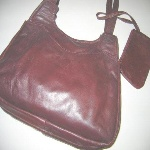

In [35]:
from IPython.display import Image
Image('messigray.jpg',width=200, height=200)

In [36]:
print(y_train[100])

[0. 1. 0. 0.]


In [37]:
base_model = InceptionV3(
    include_top = False,
    weights     = 'imagenet',
    input_shape = (img_height, img_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(NUM_OF_CLASSES, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range  = 10,
    shear_range     = 10, # 10 degrees
    zoom_range      = 0.1,
    fill_mode       = 'reflect',
    horizontal_flip = True)

In [0]:
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size  = batch_size)

In [0]:
for layer in model.layers:
    layer.trainable = True

In [0]:
model.compile(
    optimizer   = 'adam',
    loss        = 'categorical_crossentropy', 
    metrics     = ['accuracy'])

In [43]:
%%time
model.fit_generator(
    generator = train_generator,
    steps_per_epoch     = len(x_train) // 32,
    epochs = 10,
    validation_data =(x_test, y_test))

Epoch 1/10
8/8 [==============================] - 5s 579ms/step - loss: 0.8659 - acc: 0.6402 - val_loss: 1.3647 - val_acc: 0.5083
Epoch 2/10
8/8 [==============================] - 3s 430ms/step - loss: 0.6530 - acc: 0.7500 - val_loss: 1.9903 - val_acc: 0.4917
Epoch 3/10
8/8 [==============================] - 3s 430ms/step - loss: 0.4111 - acc: 0.8542 - val_loss: 3.8282 - val_acc: 0.3500
Epoch 4/10
8/8 [==============================] - 3s 430ms/step - loss: 0.7958 - acc: 0.7391 - val_loss: 2.8168 - val_acc: 0.5000
Epoch 5/10
8/8 [==============================] - 3s 426ms/step - loss: 0.6521 - acc: 0.7634 - val_loss: 2.2192 - val_acc: 0.4917
Epoch 6/10
8/8 [==============================] - 3s 426ms/step - loss: 0.5269 - acc: 0.8531 - val_loss: 6.3248 - val_acc: 0.2917
Epoch 7/10
8/8 [==============================] - 3s 427ms/step - loss: 0.3499 - acc: 0.8997 - val_loss: 6.8663 - val_acc: 0.2750
Epoch 8/10
8/8 [==============================] - 3s 427ms/step - loss: 0.4166 - acc: 0.86

In [24]:
model_json = model.to_json()
with open("material_recognition.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("material_recognition.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
y_pred = model.predict(x_test)
print(y_pred)

In [46]:
from keras.models import model_from_json
json_file = open("material_recognition.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("material_recognition.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
classes = ['metal','leather','wood','glass']

In [0]:
loaded_model.compile(
    optimizer   = 'adam',
    loss        = 'categorical_crossentropy', 
    metrics     = ['accuracy'])


In [0]:
image = cv2.imread("metal_moderate_013_new.jpg")
image = cv2.resize(image, (img_height, img_width)) 

In [61]:
%%time
result = (loaded_model.predict(np.array([image])))

CPU times: user 35.6 ms, sys: 18.1 ms, total: 53.6 ms
Wall time: 51.4 ms


In [62]:
classes[result[0].argmax()]

'metal'